In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.linear_model import LogisticRegression 

from sklearn.preprocessing import StandardScaler

In [51]:
df = pd.read_csv('diabetes.csv')
print("the size of our data is", df.size, "and the shape of it is", df.shape)
df.head()

the size of our data is 6912 and the shape of it is (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


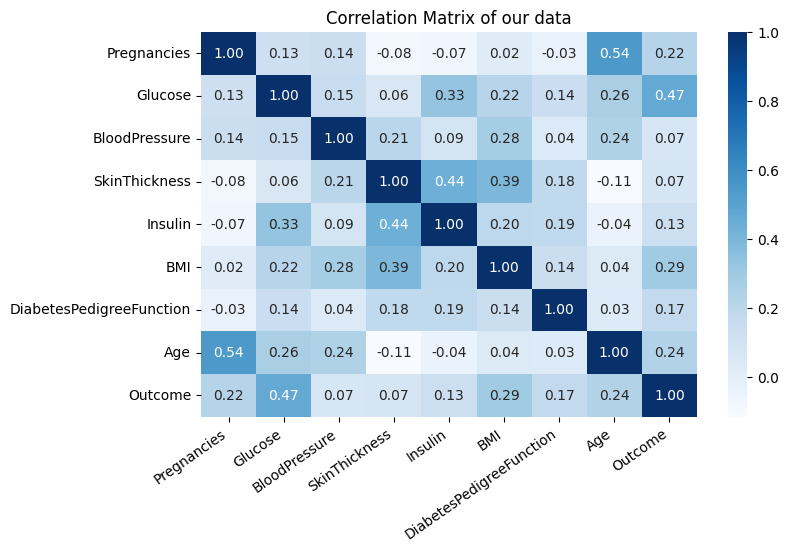

In [54]:
fig = plt.figure(figsize=(8, 5))

sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f', ax=fig.add_subplot(111))

plt.title('Correlation Matrix of our data')
plt.xticks(rotation=35, ha='right') # Rotates the x-axis labels

plt.show()

In [55]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [57]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred = dtree.predict(X_test)

# print('prediction accuracy of our train set is: ', dtree.score(X_train, y_train))
print('prediction accuracy of our test set is: ', accuracy_score(y_test, y_pred))

prediction accuracy of our test set is:  0.7467532467532467


In [59]:
print("the confusion matrix of our model using decision tree is:\n", confusion_matrix(y_test, y_pred))
print("\nAnd this is the classification report:\n", classification_report(y_test, y_pred))

the confusion matrix of our model using decision tree is:
 [[76 23]
 [16 39]]

And this is the classification report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



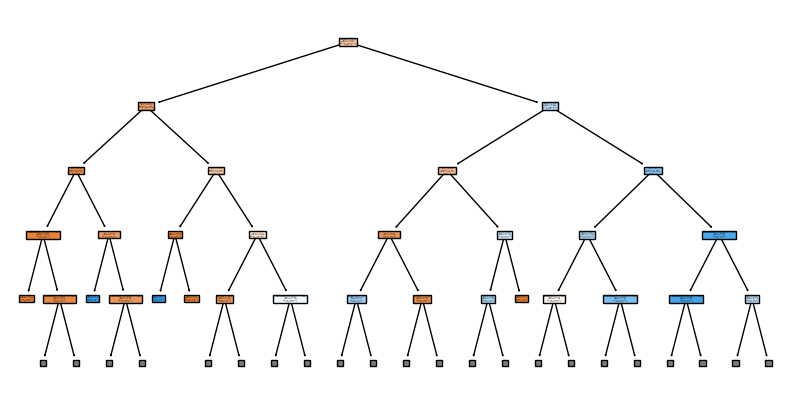

In [60]:
plt.figure(figsize=(10, 5))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['0', '1'], max_depth=4) # max_depth=None if you want to see the whole tree
plt.show()

### Comparaison between Logistic Regression & Decision Tree

##### Without using standarScaler

In [61]:
lr = LogisticRegression(solver='liblinear')

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print('prediction accuracy of our test set is: ', accuracy_score(y_test, y_pred_lr))

print("the confusion matrix of our model using logistic regression is:\n", confusion_matrix(y_test, y_pred_lr))
print("\nAnd this is the classification report:\n", classification_report(y_test, y_pred_lr))

prediction accuracy of our test set is:  0.7597402597402597
the confusion matrix of our model using logistic regression is:
 [[83 16]
 [21 34]]

And this is the classification report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



##### Using StandardScaler

In [62]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)

y_pred_lr_pipe = pipe.predict(X_test)

print('prediction accuracy of our test set is: ', accuracy_score(y_test, y_pred_lr_pipe))

prediction accuracy of our test set is:  0.7532467532467533
